In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

customer_usage = pd.read_csv('/workspaces/task_mobile/src/insights/CSV_files/Customer_Usage_Last_12_Months_new.csv', delimiter=";")
customer_usage['Date'] = pd.to_datetime(customer_usage['Date'])
customer_usage['Data'] = pd.to_numeric(customer_usage['Data'].str.replace(',', '.'), errors='coerce')


In [55]:
from mobile_analysis import MobilePlanAnalyzer

In [56]:
mobile_plans = pd.read_csv('/workspaces/task_mobile/src/insights/CSV_files/Mobile_Plans_Test_Data.csv')

customer_usage['Date'] = pd.to_datetime(customer_usage['Date'])

In [57]:
customer_usage

,CustomerID,Date,Data,Minute,SMS
0,C1001,2022-01-01,10.0,636,194
1,C1002,2022-01-01,19.1,365,673
2,C1003,2022-01-01,6.6,24,1059
3,C1004,2022-01-01,60.8,505,769
4,C1005,2022-01-01,32.7,362,569
...,...,...,...,...,...
11983,C1995,2022-01-12,14.4,756,770
11984,C1996,2022-01-12,30.8,688,345
11985,C1997,2022-01-12,1.8,882,288
11986,C1998,2022-01-12,50.9,984,737


In [58]:
mobile_plans

,Provider,Plan Name,Monthly Cost ($),Data Limit (GB),Minutes Limit,SMS Limit,Data Overcharge ($/GB),Minutes Overcharge ($/min),SMS Overcharge ($/SMS)
0,ProviderA,Basic,20,5,100,100,5,0.10,0.05
1,ProviderA,Premium,50,20,500,500,2,0.05,0.02
2,ProviderB,Standard,30,10,300,200,3,0.08,0.04
3,ProviderB,Unlimited,70,50,1000,1000,1,0.02,0.01
4,ProviderC,Economy,15,3,50,50,7,0.15,0.10
5,ProviderC,Pro,40,15,400,300,3,0.07,0.03


In [59]:
customer_usage

,CustomerID,Date,Data,Minute,SMS
0,C1001,2022-01-01,10.0,636,194
1,C1002,2022-01-01,19.1,365,673
2,C1003,2022-01-01,6.6,24,1059
3,C1004,2022-01-01,60.8,505,769
4,C1005,2022-01-01,32.7,362,569
...,...,...,...,...,...
11983,C1995,2022-01-12,14.4,756,770
11984,C1996,2022-01-12,30.8,688,345
11985,C1997,2022-01-12,1.8,882,288
11986,C1998,2022-01-12,50.9,984,737


In [60]:
analyzer = MobilePlanAnalyzer()
comparison_df = analyzer.analyze_plans()
comparison_df

,CustomerID,Best Plan,Provider,Total Cost
0,C1001,Unlimited,ProviderB,70.00
1,C1002,Premium,ProviderA,65.31
2,C1003,Unlimited,ProviderB,70.00
3,C1004,Unlimited,ProviderB,70.00
4,C1005,Unlimited,ProviderB,70.00
...,...,...,...,...
994,C1995,Unlimited,ProviderB,70.00
995,C1996,Unlimited,ProviderB,71.00
996,C1997,Unlimited,ProviderB,70.00
997,C1998,Unlimited,ProviderB,70.00


In [61]:
comparison_df.groupby('Best Plan').count()


,CustomerID,Provider,Total Cost
Best Plan,,,
Premium,299,299,299
Pro,5,5,5
Unlimited,695,695,695


In [62]:
customer_averages = customer_usage.groupby('CustomerID')[['Data', 'Minute', 'SMS']].median()
customer_averages

,Data,Minute,SMS
CustomerID,,,
C1001,31.45,620.0,577.0
C1002,25.00,546.0,650.5
C1003,34.35,758.5,438.0
C1004,32.15,731.0,562.5
C1005,34.80,347.0,370.5
...,...,...,...
C1995,26.40,669.0,520.0
C1996,50.35,464.5,387.5
C1997,31.90,814.0,573.5


In [63]:

scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_averages)


In [64]:
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)


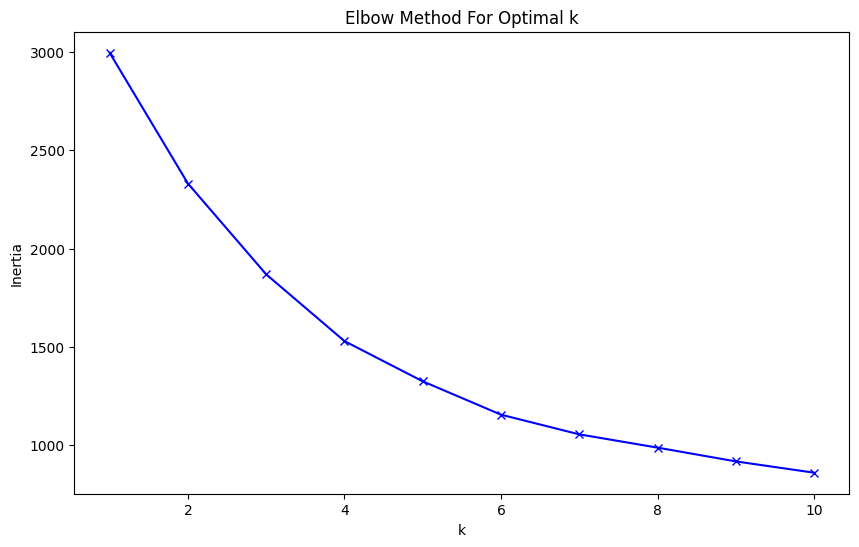

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
customer_averages['Cluster'] = kmeans.fit_predict(features_scaled)


In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = customer_averages['Cluster'].to_list()

print("\nExplained variance ratio:", pca.explained_variance_ratio_)



Explained variance ratio: [0.34238874 0.33317636]


In [67]:
pca_df

,PC1,PC2,Cluster
0,0.461369,-0.064681,1
1,0.326578,-0.773137,0
2,0.500408,0.126448,2
3,0.938296,-0.138732,2
4,-1.802548,0.810650,2
...,...,...,...
994,0.299728,-0.746977,0
995,-0.803977,2.556439,2
996,1.386217,-0.295738,1
997,0.226912,1.612810,2


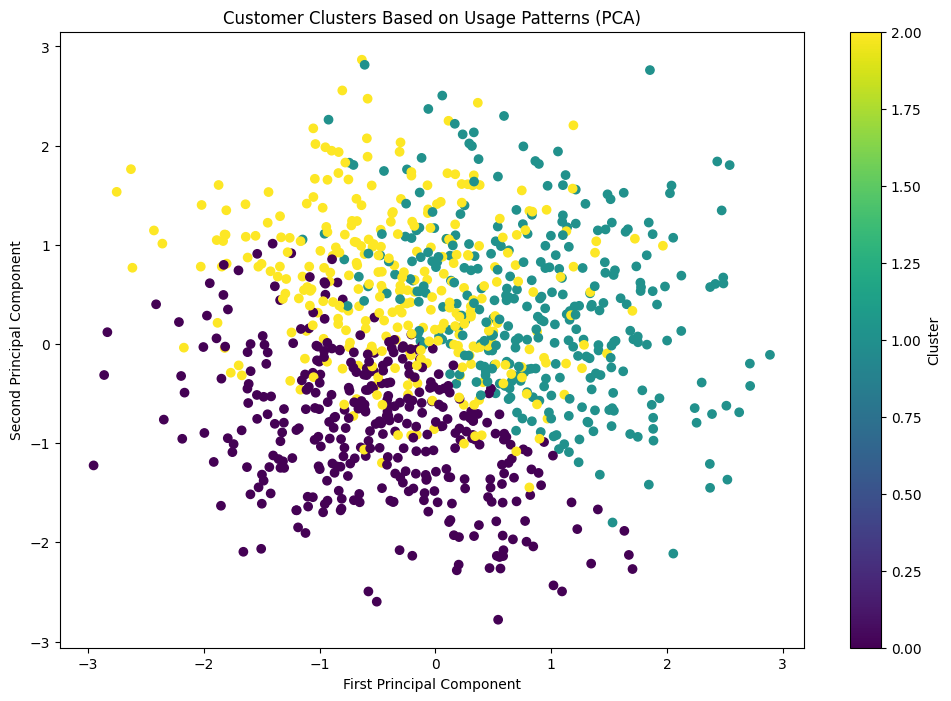


Cluster Characteristics:
              Data      Minute         SMS
Cluster                                   
0        23.622316  504.248588  528.460452
1        34.622136  574.928793  688.681115
2        35.894876  591.779503  428.874224


In [68]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], 
                     pca_df['PC2'],
                     c=pca_df['Cluster'],
                     cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Customer Clusters Based on Usage Patterns (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Print cluster characteristics
print("\nCluster Characteristics:")
print(customer_averages.groupby('Cluster').mean())